In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from intersect import intersection
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
def trend_line(x, y, degree=1):
  coeffs = np.polyfit(x, y, degree)
  poly = np.poly1d(coeffs)
  y_trend = poly(x)
  return coeffs, y_trend

def slope(x, y):
  x = np.asarray(x)
  y = np.asarray(y)
  print(x, y)
  xi = np.c_[np.ones(x.shape[0]),x]
  xinv = np.linalg.inv(np.dot(xi.T,xi))
  w = np.dot(np.dot(xinv, x.T),y)
  return w

In [4]:
frame_a = pd.read_csv("../data/optyka_307/data_a2.csv", delimiter=",")
frame_halogen = pd.read_csv("../data/optyka_307/data_b_halogen.csv", delimiter=",")
frame_tungsten = pd.read_csv("../data/optyka_307/data_b_tungsten.csv", delimiter=",")

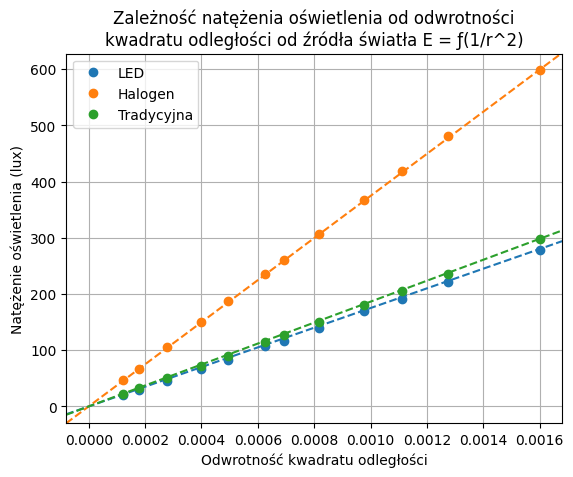

In [5]:
led = np.asarray(frame_a['led']).reshape(-1, 1)
halogen = np.asarray(frame_a['halogen']).reshape(-1, 1)
tungsten = np.asarray(frame_a['tungsten']).reshape(-1, 1)
distance = np.asarray([1/pow(x, 2) for x in frame_a['distance']]).reshape(-1, 1)

regression_led = LinearRegression().fit(distance, led)
regression_halogen = LinearRegression().fit(distance, halogen)
regression_tungsten = LinearRegression().fit(distance, tungsten)

plt.plot(distance, led, 'o', label="LED")
plt.axline(xy1=(0, 0), slope=regression_led.coef_[0][0], c='#1f77b4', ls='--')
plt.plot(distance, halogen, 'o', label="Halogen")
plt.axline(xy1=(0, 0), slope=regression_halogen.coef_[0][0], c='#ff7f0e', ls='--')
plt.plot(distance, tungsten, 'o', label="Tradycyjna")
plt.axline(xy1=(0, 0), slope=regression_tungsten.coef_[0][0], c='#2ca02c', ls='--')
plt.ylabel("Natężenie oświetlenia (lux)")
plt.xlabel("Odwrotność kwadratu odległości")
plt.title("Zależność natężenia oświetlenia od odwrotności\nkwadratu odległości od źródła światła E = ƒ(1/r^2)")
plt.legend()
plt.grid()
plt.show()

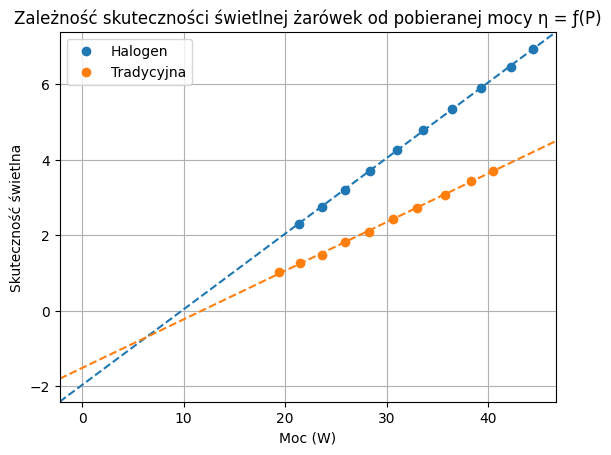

In [36]:
halogen_power = np.asarray([frame_halogen['voltage'][i] * frame_halogen['current'][i] for i in range(len(frame_halogen))]).reshape(-1, 1)
tungsten_power = np.asarray([frame_tungsten['voltage'][i] * frame_tungsten['current'][i] for i in range(len(frame_tungsten))]).reshape(-1, 1)

halogen_light = np.asarray([frame_halogen['light'][i] / halogen_power[i] for i in range(len(frame_halogen))]).reshape(-1, 1)
tungsten_light = np.asarray([frame_tungsten['light'][i] / tungsten_power[i] for i in range(len(frame_tungsten))]).reshape(-1, 1)

tungsten_regression = LinearRegression().fit(tungsten_power, tungsten_light)
halogen_regression = LinearRegression().fit(halogen_power, halogen_light)

plt.plot(halogen_power, halogen_light, 'o', label="Halogen")
plt.plot(tungsten_power, tungsten_light, 'o', label="Tradycyjna")
plt.axline(xy1=(0, halogen_regression.intercept_.item()), slope=halogen_regression.coef_[0][0], c='#1f77b4', ls='--')
plt.axline(xy1=(0, tungsten_regression.intercept_.item()), slope=tungsten_regression.coef_[0][0], c='#ff7f0e', ls='--')
plt.ylabel("Skuteczność świetlna")
plt.xlabel("Moc (W)")
plt.title("Zależność skuteczności świetlnej żarówek od pobieranej mocy η = ƒ(P)")
plt.legend()
plt.grid()
plt.show()